In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')
# %matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-dataset/HR Analytics Dashboard.pbix
/kaggle/input/hr-analytics-dataset/HR_Analytics.csv


# **Python for Data Cleaning and ETL.**

In [3]:
path = r'/kaggle/input/hr-analytics-dataset/HR_Analytics.csv'
data = pd.read_csv(path)
print(data.shape)
data.head()

(1480, 38)


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [4]:
# create index column to id as we will remove EmpID later
id = range(1,data.shape[0]+1)
data.insert(0,"id",id)
data.head()

,id,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,2,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,3,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,4,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,5,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [5]:
# A seperate object emp_id will keep employee id for checking data.
emp_id = data.loc[:,['id','EmpID']].copy()
emp_id.head()
# emp_id.to_csv('emp_id')

,id,EmpID
0,1,RM297
1,2,RM302
2,3,RM458
3,4,RM728
4,5,RM829


In [6]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'TravelRarely'],
      dtype=object)

In [7]:
# Drop columns which are not needed.
data.drop(columns=['EmpID','EmployeeNumber','EmployeeCount','Over18','StandardHours'],inplace=True)

# TravelRarely replaced by Travel_Rarely
mp = {"Travel_Rarely":"Rarely","TravelRarely":"Rarely","Travel_Frequently":"Frequently","Non-Travel":"No Travel"}
data['BusinessTravel'] = data['BusinessTravel'].map(mp)
data['BusinessTravel'].unique()

array(['Rarely', 'Frequently', 'No Travel'], dtype=object)

In [8]:
# Check Duplicate Entries
data.duplicated().sum()

0

In [9]:
# Check Data Types
data.dtypes

id                            int64
Age                           int64
AgeGroup                     object
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
SalarySlab                   object
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears           

In [10]:
# Check for NaN values
data.isnull().sum()

id                           0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSin

<Axes: >

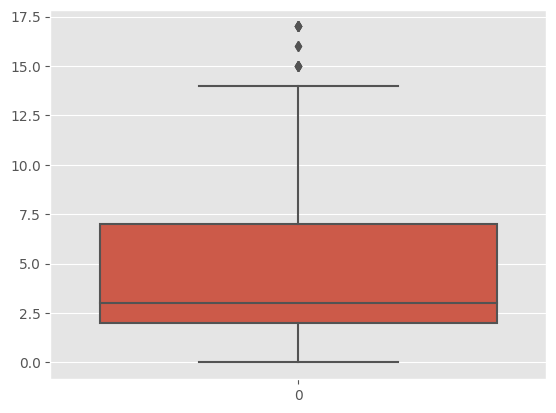

In [11]:
# Need to replace NaN values in last column.
# check for outliers, replace NaN with median if many outliers are present, else use mean.
sns.boxplot(data=data['YearsWithCurrManager'])

In [12]:
# Replace NaN with Median
data['YearsWithCurrManager'] = data['YearsWithCurrManager'].fillna(data['YearsWithCurrManager'].median())
data['YearsWithCurrManager'].isnull().sum()

0

# **Exploratory Data Analysis**

In [13]:
# Seperating numeric and categorical features
cat_feature = [feature for feature in data.columns if data[feature].dtype=='O' and len(data[feature].unique()) < 10]
num_feature = [feature for feature in data.columns if data[feature].dtype==float or data[feature].dtype==int and feature not in ['id']]
print("Number of Categorical Features: {}".format(len(cat_feature)))
print(cat_feature)
print("Number of Numeric Feateres: {}".format(len(num_feature)))
print(num_feature)

Number of Categorical Features: 10
['AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime']
Number of Numeric Feateres: 23
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [20]:
# Seperating discrete and continous numeric features
disc = [feature for feature in num_feature if len(data[feature].unique()) < 20]
cont = [feature for feature in num_feature if feature not in disc]
# len(data[feature].unique()) > 25
print("Number of Discrete features: {}".format(len(disc)))
print(disc)
print("Number of Continous features: {}".format(len(cont)))
print(cont)

Number of Discrete features: 15
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Number of Continous features: 8
['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']


In [15]:
# Total Attrition
at = data.query('Attrition == "Yes"').count()[0]
print ("Number of positions in Attrition: {}".format(at))
attr = at/data.shape[0]*100
print ("Total Attrition Percentage: {}".format(round(attr,1)))

Number of positions in Attrition: 238
Total Attrition Percentage: 16.1


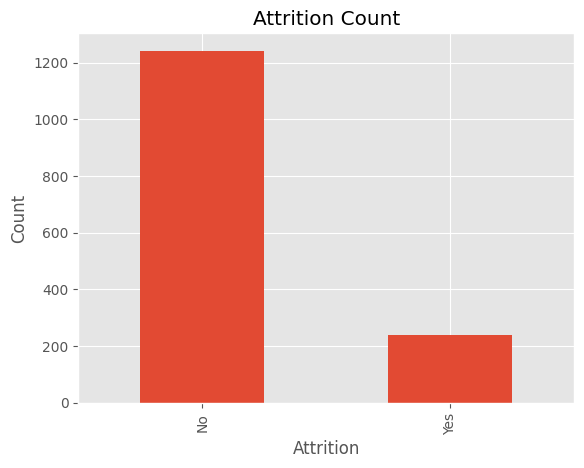

In [16]:
# barplot for attrition count - categorical data frequency
ax = data['Attrition'].value_counts().plot(kind='bar',title='Attrition Count',ylabel='Count')

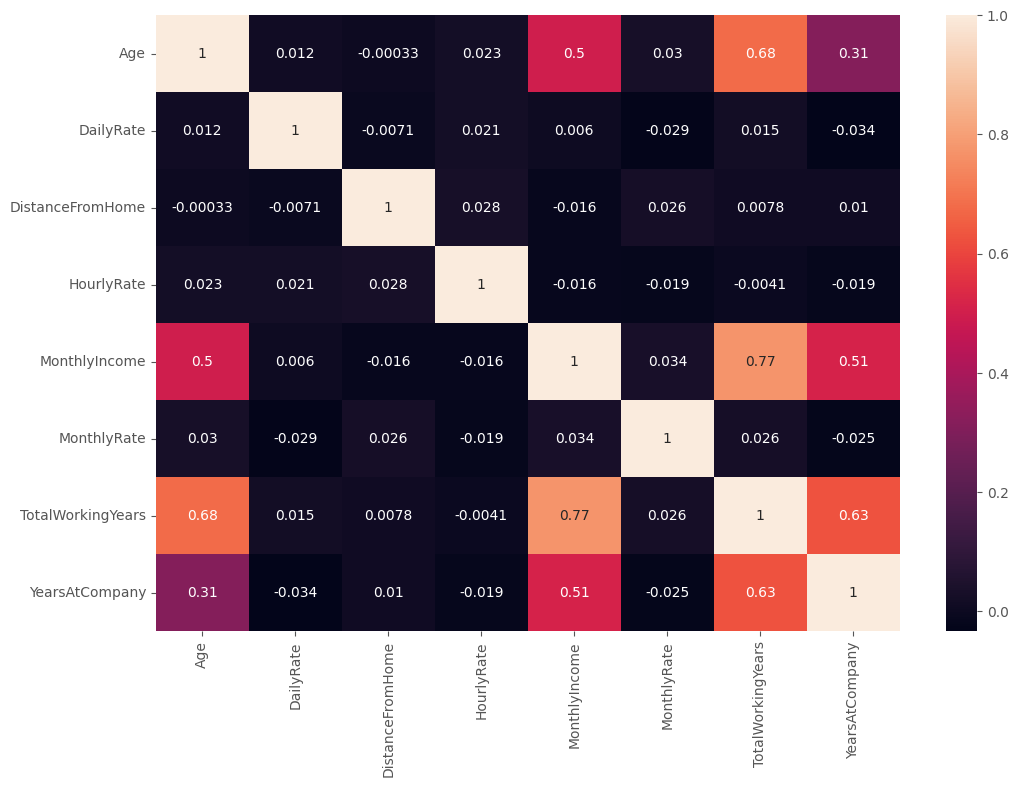

In [21]:
# Correlation between numerical features

corr = data[cont].dropna().corr()
corr_fig = plt.figure(figsize=(12,8))
corr_fig = sns.heatmap(data=corr, annot=True)

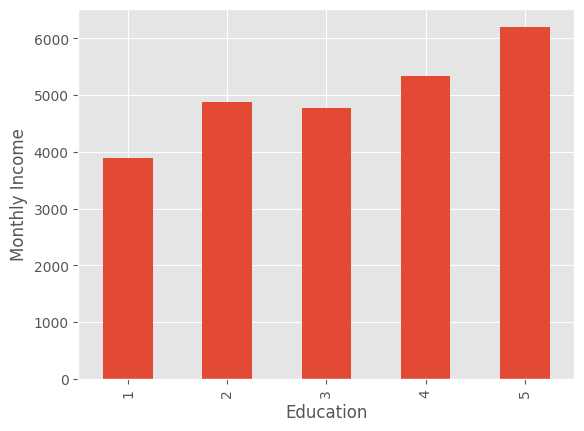

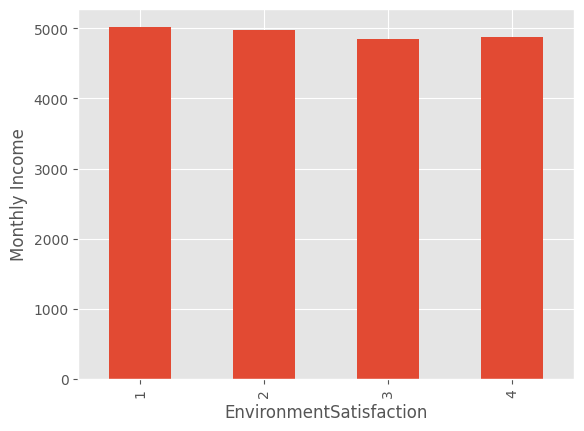

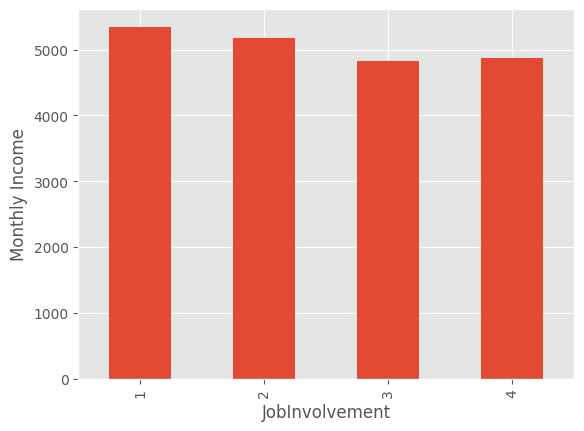

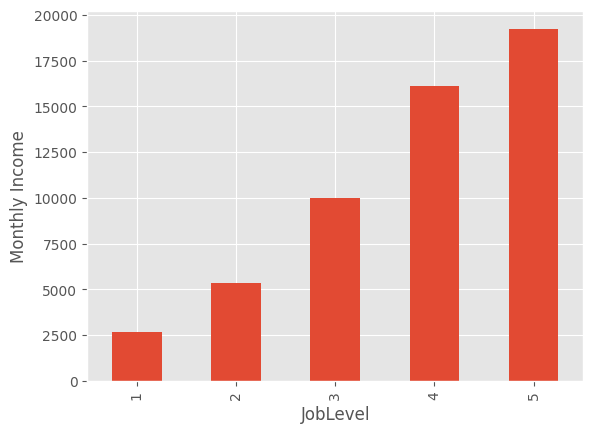

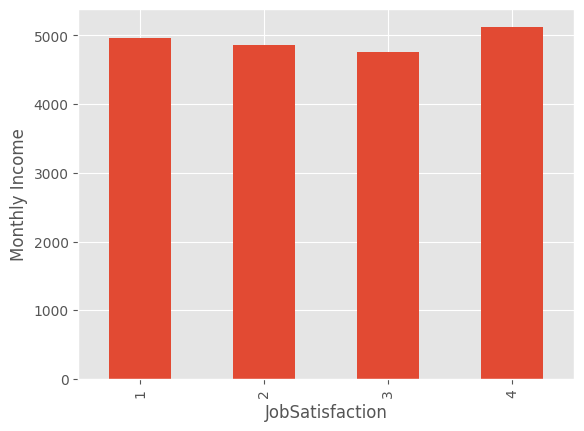

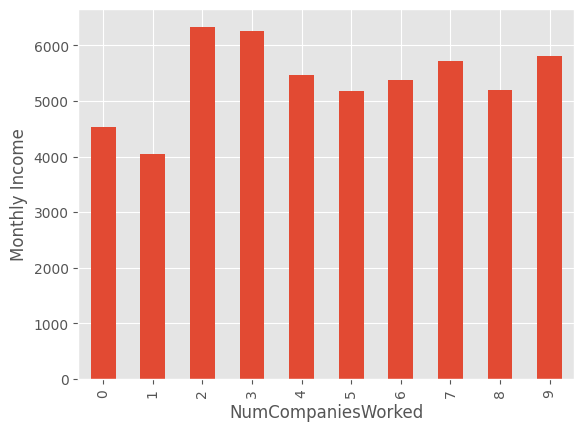

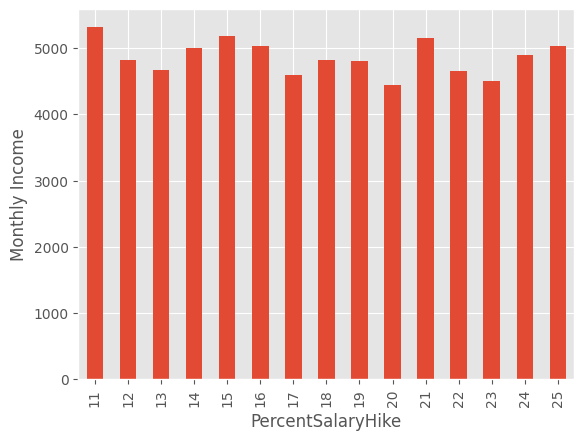

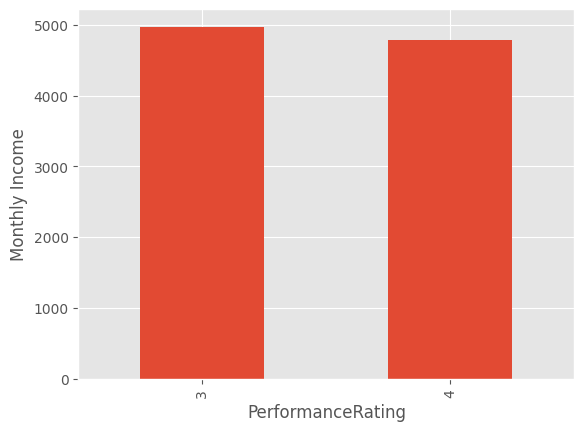

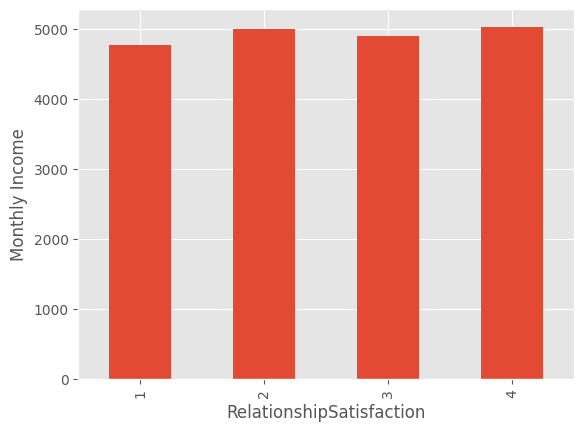

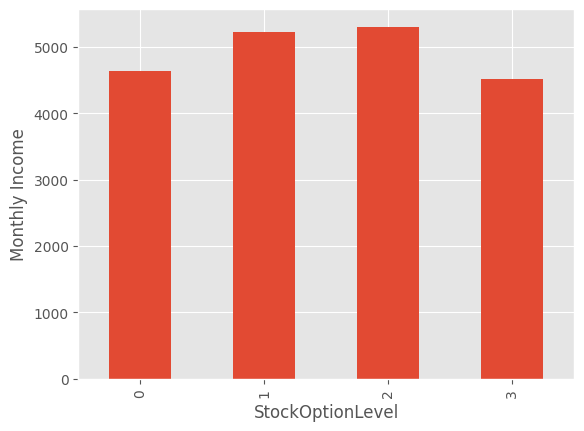

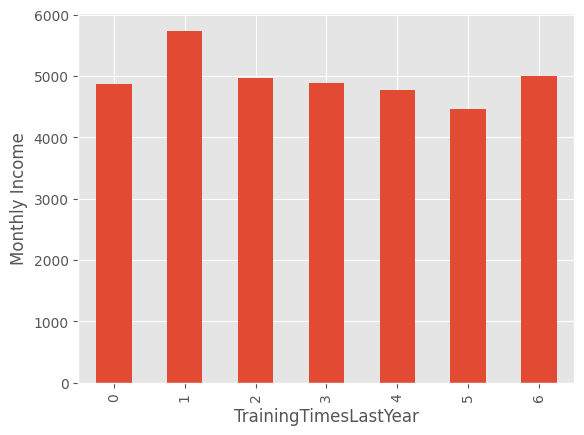

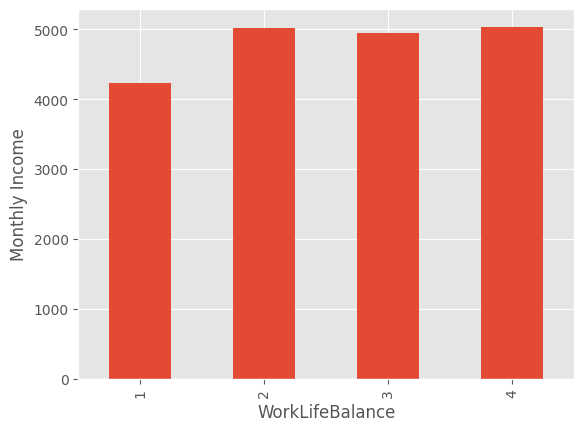

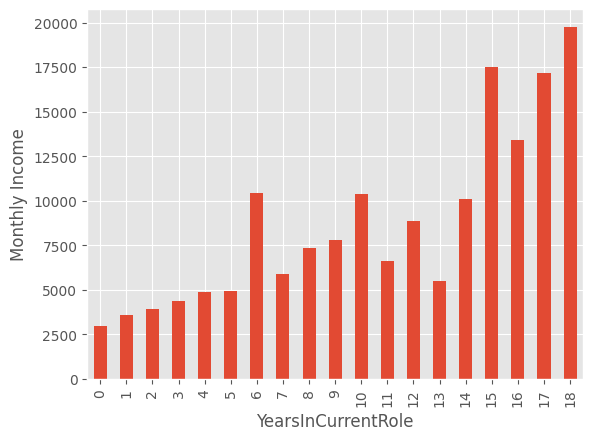

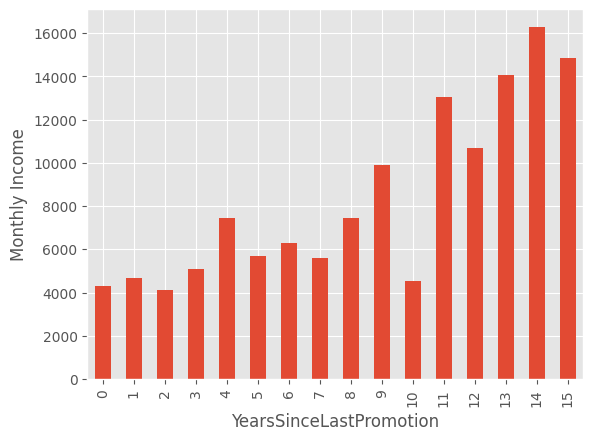

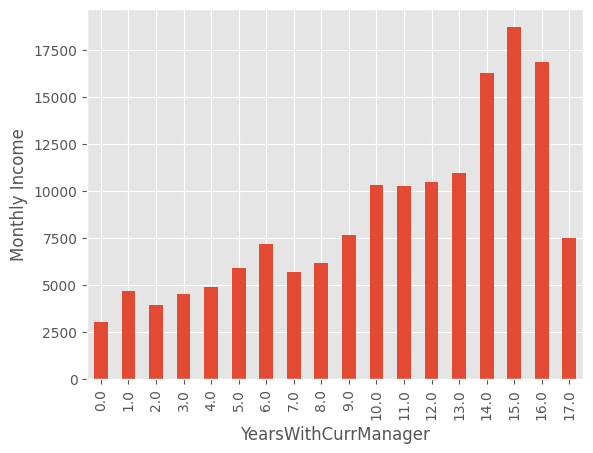

In [22]:
# Plot Discrete features against Monthly Income
for feature in disc:
    df = data.copy()
    df.groupby(feature)['MonthlyIncome'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Monthly Income')
    plt.show()

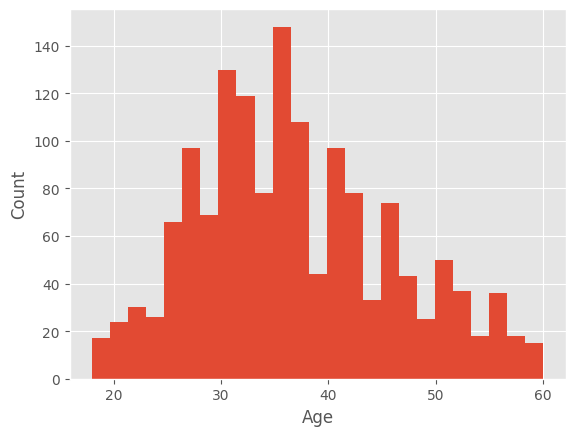

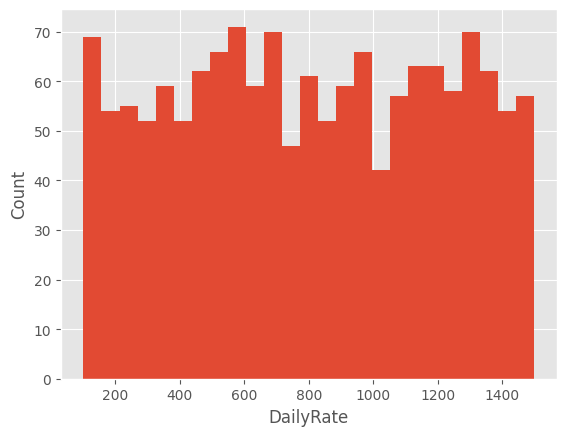

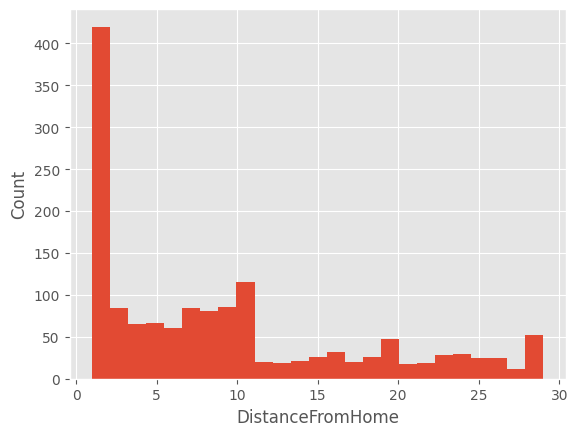

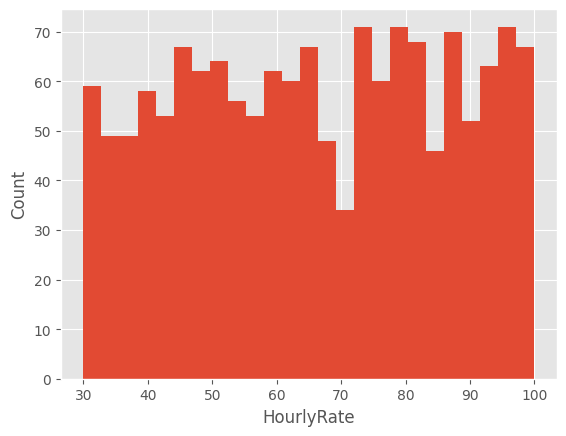

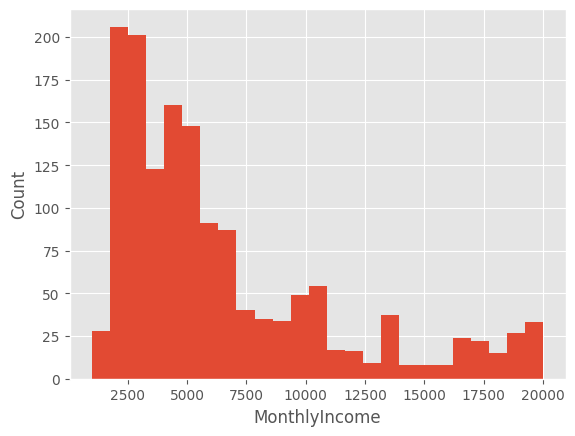

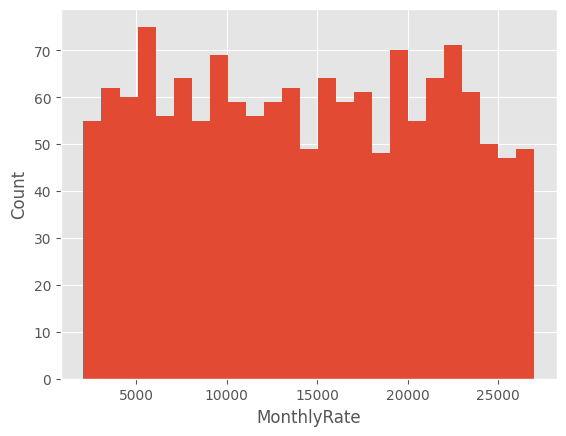

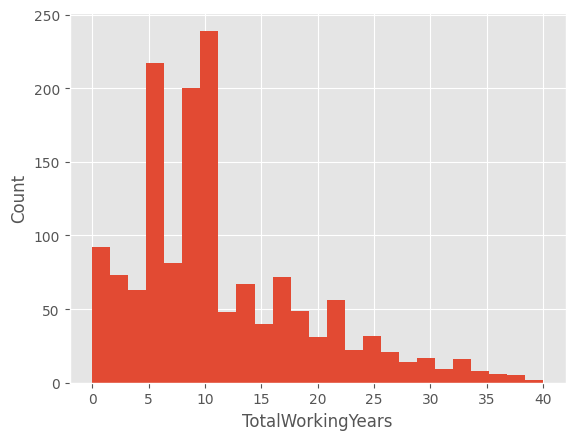

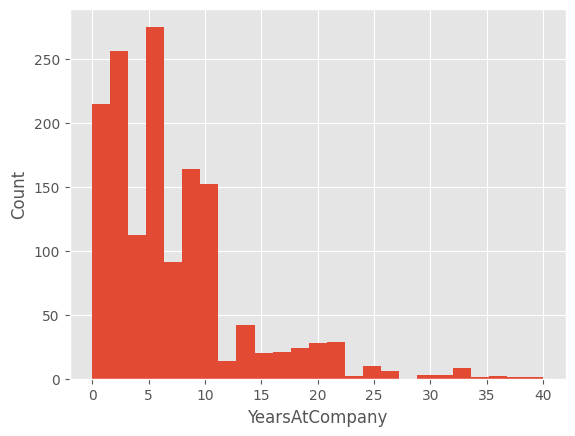

In [23]:
# Plot Continuous features
for feature in cont:
    df = data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

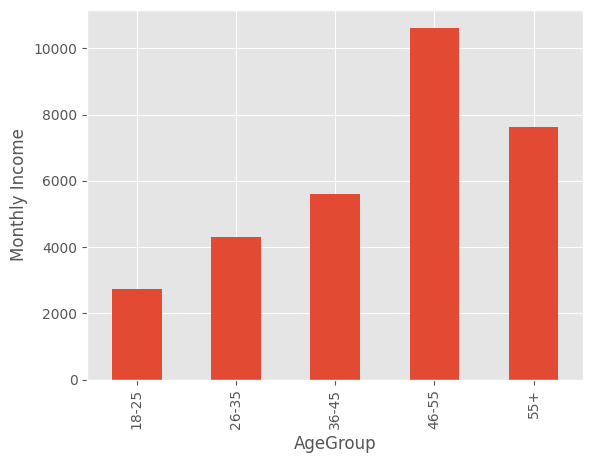

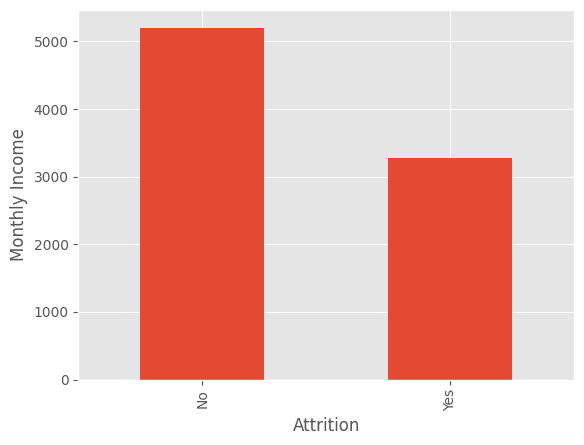

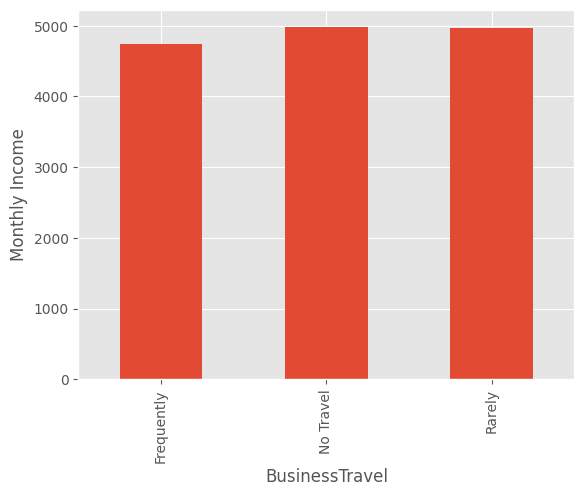

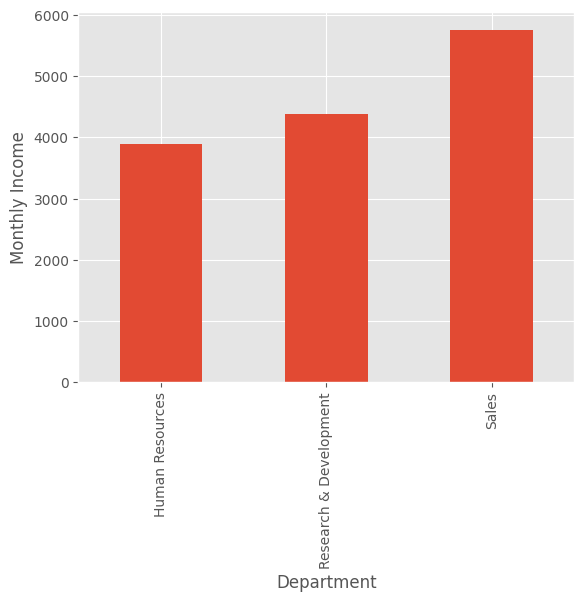

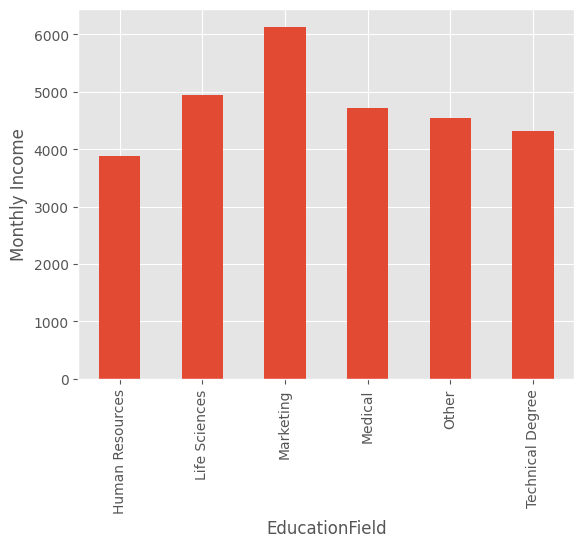

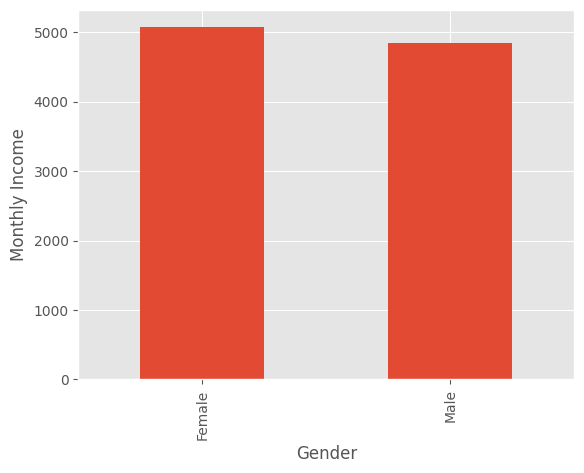

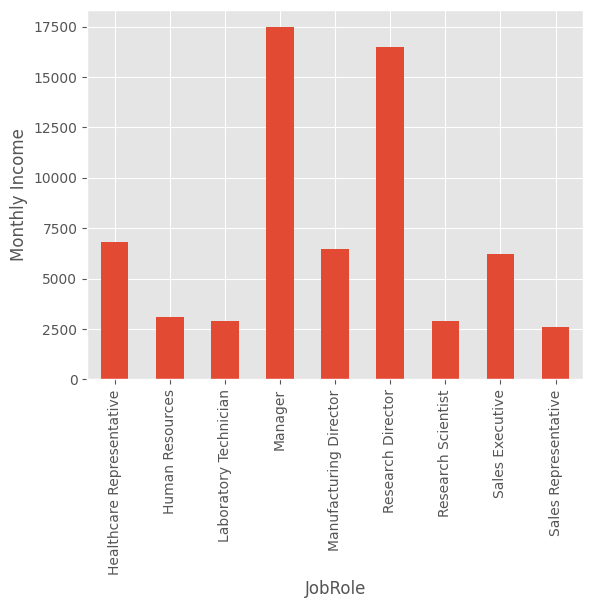

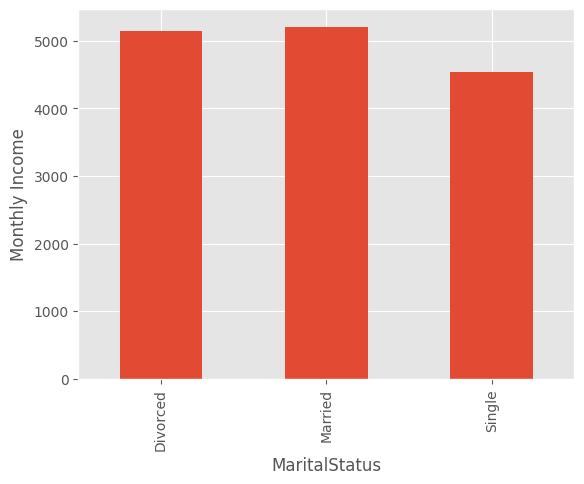

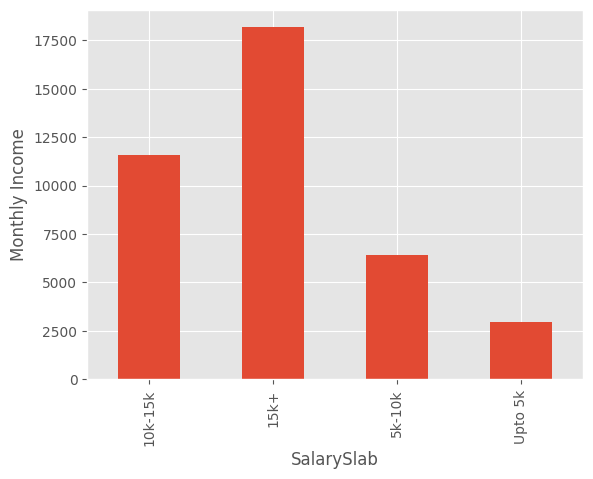

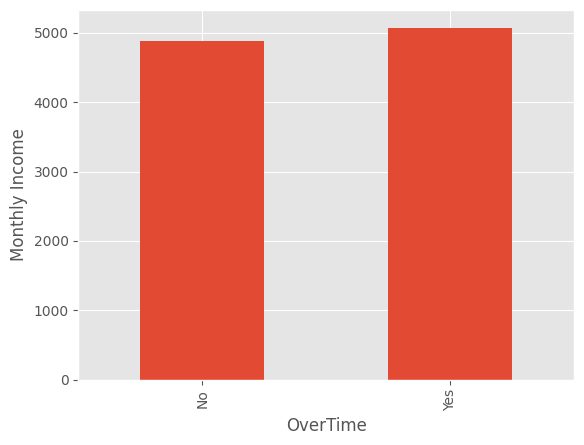

In [24]:
# Plot Categorical features against monthly Income
for feature in cat_feature:
    df = data.copy()
    df.groupby(feature)['MonthlyIncome'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Monthly Income')
    plt.show()

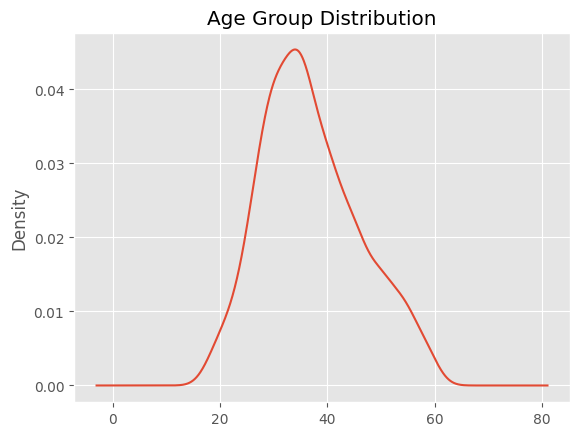

In [25]:
# Kernel Density Plot for Age distribution
ax1 = data['Age'].plot(kind='kde',title='Age Group Distribution',ylabel="Count")

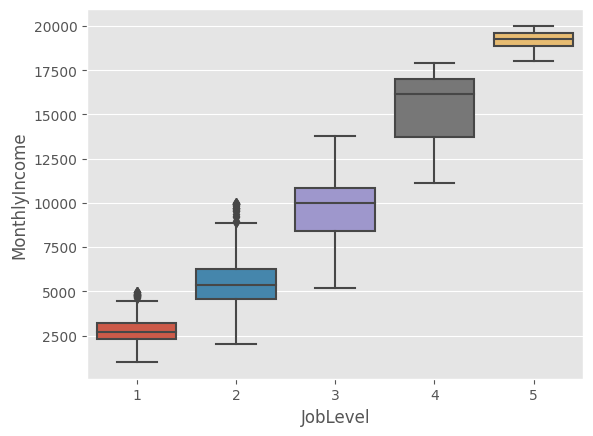

In [26]:
# Boxplot, for job level. occasional overlap between some job levels. 
ax2 =sns.boxplot(data=data,x=data.JobLevel, y=data.MonthlyIncome)

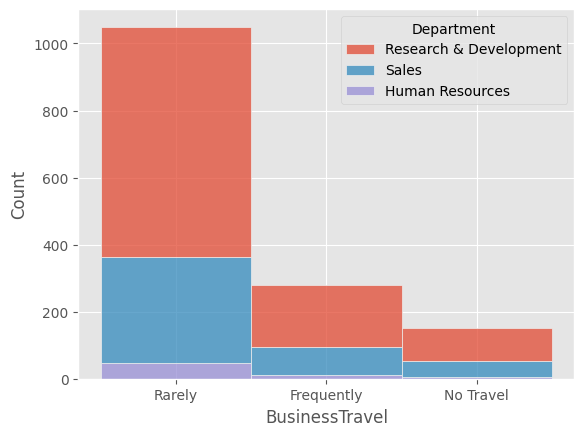

In [27]:
ax3 = sns.histplot(x=data.BusinessTravel,data=data, hue='Department', multiple='stack')

In [28]:
data.columns

Index(['id', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# **Loading Dataframes into CSV Files**

In [29]:
# Department Table
df_dept = data[['id','Department','Attrition']].copy()
mp = {"Yes":1,"No":0}
df_dept['Attr_num']=df_dept['Attrition'].map(mp)
df_dept = df_dept.groupby('Department')['Attr_num'].agg(Total_Count='count',Attr_Count='sum')
df_dept['Attr_Perc'] = df_dept['Attr_Count']/df_dept['Total_Count']*100
df_dept.head()
#df_dept.to_csv('department.csv')

,Total_Count,Attr_Count,Attr_Perc
Department,,,
Human Resources,63,12,19.047619
Research & Development,967,133,13.753878
Sales,450,93,20.666667


In [32]:
# Create different csv files for data modelling

df_emp = data.loc[:,['id','Age','AgeGroup','DistanceFromHome','Education',
              'EducationField','Gender','MaritalStatus','NumCompaniesWorked']]


df_fb = data.loc[:,['id','EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']]


df_work = data.loc[:,['id','Attrition','BusinessTravel','DailyRate','Department',
               'HourlyRate','JobInvolvement','JobLevel','JobRole','MonthlyRate','OverTime']]


df_sal = data.loc[:,['id','MonthlyIncome','PercentSalaryHike','PerformanceRating','StockOptionLevel','SalarySlab']]


df_rel = data.loc[:,['id', 'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole',
               'YearsSinceLastPromotion','YearsWithCurrManager','TotalWorkingYears']]

In [33]:
#check shapes of files
all_df = [df_emp, df_fb, df_work, df_sal, df_rel]
for df in all_df:
    print(df.shape)

(1480, 9)
(1480, 5)
(1480, 11)
(1480, 6)
(1480, 7)


In [34]:
# Create CSV Files
df_emp.to_csv('emp_data.csv')
df_fb.to_csv('feedback.csv')
df_work.to_csv('work_data.csv')
df_sal.to_csv('emp_sal.csv')
df_rel.to_csv('emp_relation.csv')